In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [64]:
df=pd.read_csv('trainn.csv')

In [136]:
import seaborn as sns
data=sns.load_dataset('titanic')
#data = pd.read_csv('titanic.csv')

In [137]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [139]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [140]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,sex_encoded,Embarked_encoded
0,0,3,male,22.0,1,0,S,1,2
1,1,1,female,38.0,1,0,C,0,0
2,1,3,female,26.0,0,0,S,0,2
3,1,1,female,35.0,1,0,S,0,2
4,0,3,male,35.0,0,0,S,1,2
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S,1,2
887,1,1,female,19.0,0,0,S,0,2
888,0,3,female,28.0,1,2,S,0,2
889,1,1,male,26.0,0,0,C,1,0


In [143]:
data.groupby(['sex'])['survived'].sum()

sex
female    233
male      109
Name: survived, dtype: int64

In [147]:
corr_matrix=data.corr(numeric_only=True)

In [65]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [67]:
df.drop(columns=['Fare','PassengerId','Name','Ticket','Cabin'], inplace=True)

In [68]:
df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
764,0,3,male,16.0,0,0,S
264,0,3,female,28.0,0,0,Q
777,1,3,female,5.0,0,0,S
67,0,3,male,19.0,0,0,S
300,1,3,female,28.0,0,0,Q


In [69]:
df.isnull().mean()*100

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Embarked    0.0
dtype: float64

# Visualisation

In [70]:
import seaborn as sns

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


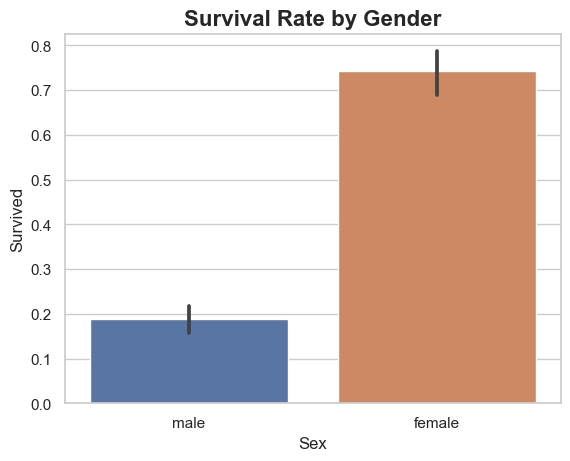

In [71]:
sns.set_theme(style="whitegrid")
barplot = sns.barplot(x='Sex', y='Survived', data=df)
barplot.set_title('Survival Rate by Gender', fontsize=16, weight='bold')

survival_rates = df.groupby('Sex')['Survived'].mean() * 100
print("Percentage of females who survived:", survival_rates['female'])
print("Percentage of males who survived:", survival_rates['male'])

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


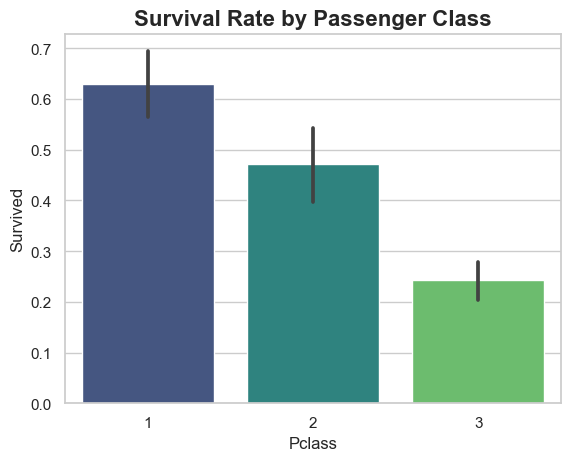

In [72]:
sns.set(style="whitegrid")
barplot=sns.barplot(x='Pclass', y='Survived', data=df, palette="viridis")
barplot.set_title('Survival Rate by Passenger Class', fontsize=16, weight='bold')

pclass_survival_rates = df.groupby('Pclass')['Survived'].mean() * 100
print("Percentage of Pclass = 1 who survived:", pclass_survival_rates[1])
print("Percentage of Pclass = 2 who survived:", pclass_survival_rates[2])
print("Percentage of Pclass = 3 who survived:", pclass_survival_rates[3])

Percentage of 0 SibSp who survived: 53.588516746411486
Percentage of 1 SibSp who survived: 46.42857142857143
Percentage of 2 SibSp who survived: 25.0
Percentage of 3 SibSp who survived: 16.666666666666664
Percentage of 4 SibSp who survived: 0.0


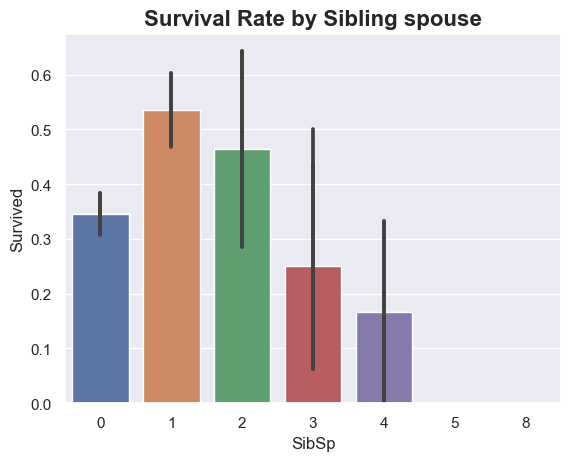

In [73]:
sns.set(style="darkgrid")
sns.barplot(x="SibSp", y="Survived", data=df)
barplot = sns.barplot(x="SibSp", y='Survived', data=df)
barplot.set_title('Survival Rate by Sibling spouse', fontsize=16, weight='bold')

sibsp_survival_rates = df.groupby('SibSp')['Survived'].mean() * 100
print("Percentage of 0 SibSp who survived:", sibsp_survival_rates[1])
print("Percentage of 1 SibSp who survived:", sibsp_survival_rates[2])
print("Percentage of 2 SibSp who survived:", sibsp_survival_rates[3])
print("Percentage of 3 SibSp who survived:", sibsp_survival_rates[4])
print("Percentage of 4 SibSp who survived:", sibsp_survival_rates[5])

Percentage of 0 Parch who survived: 55.08474576271186
Percentage of 1 Parch who survived: 50.0
Percentage of 2 Parch who survived: 60.0
Percentage of 3 Parch who survived: 0.0
Percentage of 4 Parch who survived: 20.0


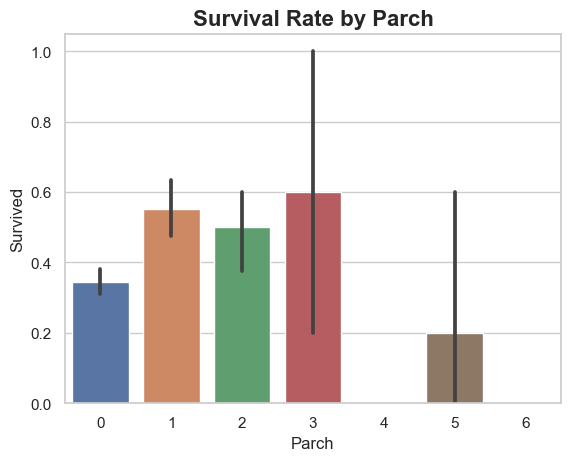

In [74]:
sns.set(style="dark")
sns.set_theme(style="whitegrid")
barplot = sns.barplot(x='Parch', y='Survived', data=df)
barplot.set_title('Survival Rate by Parch', fontsize=16, weight='bold')

parch_survival_rates = df.groupby('Parch')['Survived'].mean() * 100
print("Percentage of 0 Parch who survived:", parch_survival_rates[1])
print("Percentage of 1 Parch who survived:", parch_survival_rates[2])
print("Percentage of 2 Parch who survived:", parch_survival_rates[3])
print("Percentage of 3 Parch who survived:", parch_survival_rates[4])
print("Percentage of 4 Parch who survived:", parch_survival_rates[5])

Percentage of passangers from Cherbourg who survived: 55.35714285714286
Percentage of passangers from Queenstown who survived: 38.961038961038966
Percentage of passangers from Southampton who survived: 33.90092879256966


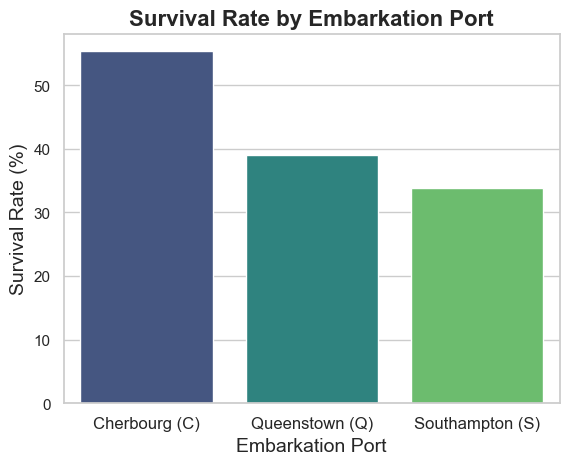

In [129]:
embark_survival_rates = df.groupby('Embarked')['Survived'].mean() * 100
embark_survival_df = embark_survival_rates.reset_index()
embark_survival_df.columns = ['Embarked', 'Survival Rate']
barplot = sns.barplot(x='Embarked', y='Survival Rate', data=embark_survival_df, palette='viridis')
barplot.set_title('Survival Rate by Embarkation Port', fontsize=16, weight='bold')
barplot.set_xlabel('Embarkation Port', fontsize=14)
barplot.set_ylabel('Survival Rate (%)', fontsize=14)
barplot.set_xticklabels(['Cherbourg (C)', 'Queenstown (Q)', 'Southampton (S)'], fontsize=12)

embarked_survival_rates = df.groupby('Embarked')['Survived'].mean() * 100
print("Percentage of passangers from Cherbourg who survived:", embarked_survival_rates [0])
print("Percentage of passangers from Queenstown who survived:", embarked_survival_rates [1])
print("Percentage of passangers from Southampton who survived:", embarked_survival_rates [2])

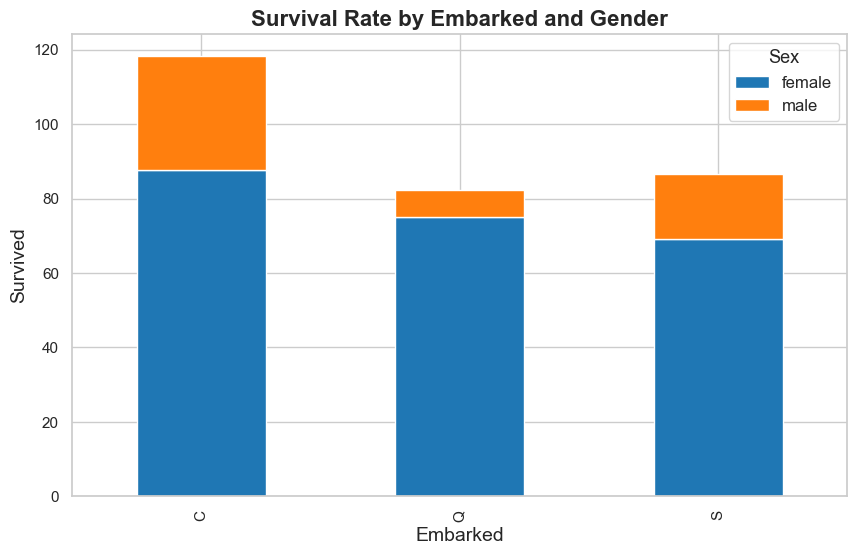

In [76]:
sns.set_theme(style="whitegrid")
survival_rates = df.groupby(['Embarked', 'Sex'])['Survived'].mean().unstack() * 100
survival_rates.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('Survival Rate by Embarked and Gender', fontsize=16, weight='bold')
plt.xlabel('Embarked', fontsize=14)
plt.ylabel('Survived', fontsize=14)
plt.legend(title='Sex', title_fontsize='13', fontsize='12')
plt.show()

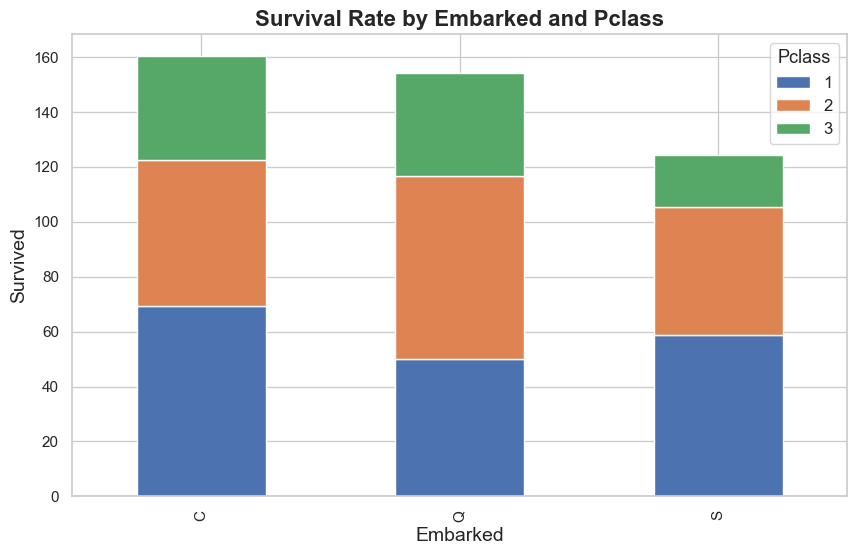

In [77]:
sns.set_theme(style="whitegrid")
survival_rates = df.groupby(['Embarked', 'Pclass'])['Survived'].mean().unstack() * 100
survival_rates.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Survival Rate by Embarked and Pclass', fontsize=16, weight='bold')
plt.xlabel('Embarked', fontsize=14)
plt.ylabel('Survived', fontsize=14)
plt.legend(title='Pclass', title_fontsize='13', fontsize='12')
plt.show()

# Chi-Square

In [78]:
df.corr(numeric_only=True)

,Survived,Pclass,Age,SibSp,Parch
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000


In [79]:
from scipy.stats import chi2_contingency
def chi_square_test(column):
    contingency_table = pd.crosstab(df[column], df['Survived'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    return chi2, p

columns_to_test = ['Pclass', 'Sex', 'Embarked']

for column in columns_to_test:
    chi2, p = chi_square_test(column)
    print(f"Chi-Square Test for {column}")
    print(f"Chi2 Statistic: {chi2:.2f}")
    print(f"P-value: {p:.5f}")
    print(f"{'Significant' if p < 0.05 else 'Not Significant'}\n")

Chi-Square Test for Pclass
Chi2 Statistic: 102.89
P-value: 0.00000
Significant

Chi-Square Test for Sex
Chi2 Statistic: 260.72
P-value: 0.00000
Significant

Chi-Square Test for Embarked
Chi2 Statistic: 25.96
P-value: 0.00000
Significant



In [80]:
categorical_features = ['Sex', 'Embarked']
categorical_transformer = OneHotEncoder()

In [81]:
label_encoder = LabelEncoder()

In [82]:
df['sex_encoded'] = label_encoder.fit_transform(df['Sex'])

In [106]:
df['Embarked_encoded'] = label_encoder.fit_transform(df['Embarked'])

In [107]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,sex_encoded,Embarked_encoded
0,0,3,male,22.0,1,0,S,1,2
1,1,1,female,38.0,1,0,C,0,0
2,1,3,female,26.0,0,0,S,0,2
3,1,1,female,35.0,1,0,S,0,2
4,0,3,male,35.0,0,0,S,1,2


In [108]:
features = ['Pclass', 'sex_encoded', 'Age', 'SibSp', 'Parch', 'Embarked_encoded']
X = df[features]
y = df['Survived']

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

In [111]:
from sklearn.model_selection import GridSearchCV
parameter={'penalty':['l2','elasticnet'],'C':[1,2,3,4,5,6,7,8,10],'max_iter':[100,200,300]}

In [112]:
classifier_regressor=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)

In [113]:
classifier_regressor.fit(X_train,y_train)

C:\Users\Daya\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
135 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Daya\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Daya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Daya\anaconda3\Lib\site-packages\sklearn\linear_model\_log

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 10],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l2', 'elasticnet']},
             scoring='accuracy')

In [114]:
print(classifier_regressor.best_params_)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}


In [115]:
print(classifier_regressor.best_score_)

0.7878459568600413


In [117]:
y_predict=classifier_regressor.predict(X_test)

In [118]:
from sklearn.metrics import accuracy_score,classification_report

In [119]:
score=accuracy_score(y_predict,y_test)
print(score)

0.8100558659217877


In [120]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_predict,y_test)

array([[90, 19],
       [15, 55]], dtype=int64)

In [122]:
classifier_regressor.best_estimator_.intercept_

array([4.84210752])

In [123]:
classifier_regressor.best_estimator_.coef_

array([[-1.00915549, -2.59778641, -0.0305702 , -0.27782618, -0.08234692,
        -0.24738321]])

In [124]:
coef=classifier_regressor.best_estimator_.coef_.flatten().tolist()

In [125]:
inter=round(classifier_regressor.best_estimator_.intercept_[0],2)
inter

4.84

# Model 

In [126]:
model="Intercept*"
model+=str(inter)+" "

In [127]:
for i in  range(0,len(features)):
    if coef[i]>0:
        model+=" + "
        model+=(str(round(coef[i],2))+"*"+(str(features[i])))
    else:
        model+=" "+(str(round(coef[i],2))+"*"+(str(features[i])))

In [128]:
model

'Intercept*4.84  -1.01*Pclass -2.6*sex_encoded -0.03*Age -0.28*SibSp -0.08*Parch -0.25*Embarked_encoded'

# Using Pipeline

In [150]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),('scaler', StandardScaler()), ('classifier', LogisticRegression())])

In [151]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['Sex', 'Embarked'])])),
                ('scaler', StandardScaler()),
                ('classifier', LogisticRegression())])

In [152]:
y_pred = pipeline.predict(X_test)

In [153]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [154]:
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.81
Confusion Matrix:
[[91 14]
 [20 54]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

